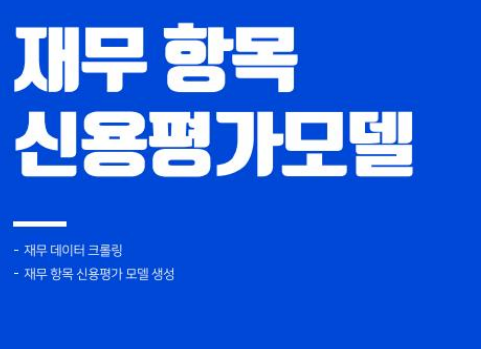

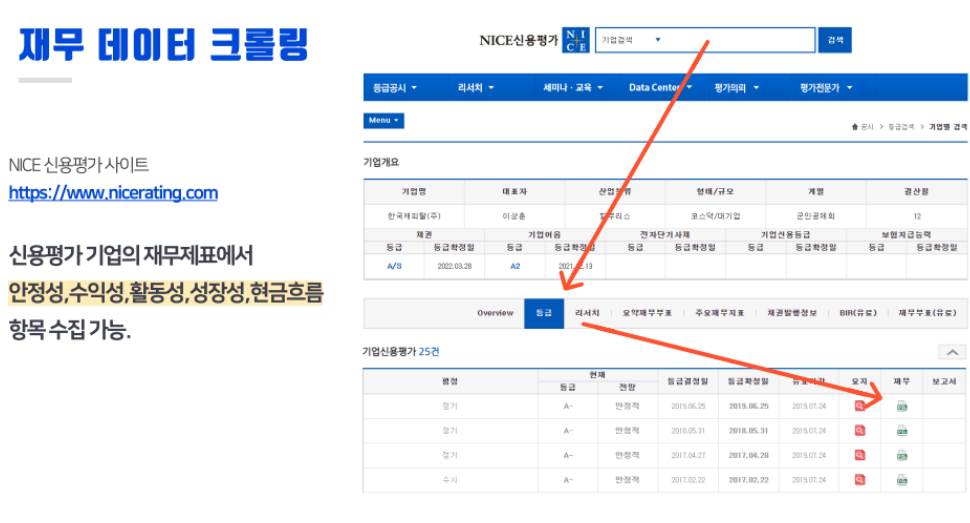

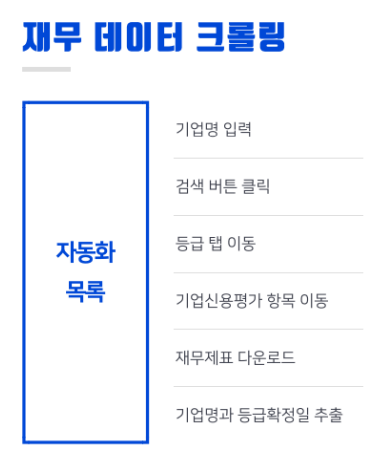



In [ ]:
import pandas as pd 
df = pd.read_csv('drop_company.csv', encoding='utf-8')

df_comname = df['기업명']
comname_list = df_comname.tolist()

df

In [ ]:
# 파일다운로드 

import requests
import bs4
from bs4 import BeautifulSoup 
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

def get_download(comname):

    url = 'https://www.nicerating.com/disclosure/companyGradeInfo.do?cmpCd=1437314&deviceType=N&isPaidMember=false'
    driver = webdriver.Chrome('C:/Users/82104/Desktop/Untitled Folder/chromedriver')
    driver.implicitly_wait(5)
    driver.get(url)

    검색 = driver.find_element(by=By.XPATH, value='//*[@id="mainSText"]')
    검색.send_keys(comname)

    검색클릭 = driver.find_element(by=By.XPATH, value='//*[@id="searchform"]/fieldset/input')
    검색클릭.click()

    time.sleep(2)
    
    try:
        등급 = driver.find_element(by=By.XPATH, value='//*[@id="tabCompany"]/li[2]/a')
    
    except: 
        pass
    
    else:
        등급 = driver.find_element(by=By.XPATH, value='//*[@id="tabCompany"]/li[2]/a')
        등급.click()
    
        try: 
            driver.find_element(by=By.XPATH, value='//*[@id="tbl4"]/tbody/tr[1]/td[8]/a')
        except:
            pass

        else: 
            time.sleep(5)
            다운로드 = driver.find_element(by=By.XPATH, value='//*[@id="tbl4"]/tbody/tr[1]/td[8]/a')
            다운로드.click()
            time.sleep(5)

            등급확정일 = driver.find_element(by=By.XPATH, value='//*[@id="tbl4"]/tbody/tr[1]/td[5]')
            date = 등급확정일.text


            이름 = driver.find_element(by=By.XPATH, value='//*[@id="dBody"]/section/div[2]/table[1]/tbody/tr/td[1]')
            name = 이름.text
            
            return name, date

    

In [ ]:
# 비금융권 회사들 제무제표 불러오기  

df_list_nonbankname=[]
def get_df_nonbank(filename):
    
    try : 
        pd.read_excel('com_list/'+ filename + '.xlsx', header=None)
    except:
        pass
    else: 


        df = pd.read_excel('com_list/'+ filename + '.xlsx', header=None)


        #df = df[['회계기준', 'K-IFRS', 'K-IFRS.1', 'K-IFRS.2', 'K-IFRS.3', 'K-IFRS.4', 'K-IFRS.5', 'K-IFRS.6', 'K-IFRS.7']]
        #df.values == '회계기준'
        #df.values
        #df = df[df.values == '유동자산'.index:]


        try :
            df[df.values == '유동자산'].index[0]


        except:
            #print(filename +'은 형식이 다릅니다')
            #com_delete_list.append(filename)

            pass


        else:
            df = df.iloc[:, 2:]
            df = df[df[df.values == '유동자산'].index[0]:]
            #df.drop(columns= [df[df[0:1].isnull()].columns.tolist()])

            value_list = df[1:2].isnull().values.tolist()

            null_list=[]
            for n,i in enumerate(value_list[0]):

                if i == True :

                    null_list.append(n)

                else: 
                    pass 

            column_list = []
            for n in null_list:    
                column = df.columns[n]
                column_list.append(column)

            df = df.drop(columns=column_list)
            df1 = df.iloc[:, 0]
            df2 = df.iloc[:, -7:-1]
            df= pd.concat([df1, df2], axis=1)
            
            if len(df.columns) == 7:
            
                df.columns = ['회계기준', 'K-IFRS', 'K-IFRS.1', 'K-IFRS.2', 'K-IFRS.3', 'K-IFRS.4', 'K-IFRS.5']
                df.index = range(len(df.index))

                print(df)
                df_list_nonbankname.append(filename)
                return df 



In [ ]:
#금융권 회사들 제무제표 불러오기 

df_list_bankname=[]
def get_df_bank(filename):

    df = pd.read_excel('com_list/'+ filename + '.xlsx', header=None)


    #df = df[['회계기준', 'K-IFRS', 'K-IFRS.1', 'K-IFRS.2', 'K-IFRS.3', 'K-IFRS.4', 'K-IFRS.5', 'K-IFRS.6', 'K-IFRS.7']]
    #df.values == '회계기준'
    #df.values
    #df = df[df.values == '유동자산'.index:]
    
    
    try :
        df[df.values == '현금및예치금'].index[0]
    

    except:
        #print(filename +'은 형식이 다릅니다')
        #com_delete_list.append(filename)
        
        pass
        
    
    else:
        df = df.iloc[:, 2:]
        df = df[df[df.values == '현금및예치금'].index[0]:]
        #df.drop(columns= [df[df[0:1].isnull()].columns.tolist()])

        value_list = df[1:2].isnull().values.tolist()

        null_list=[]
        for n,i in enumerate(value_list[0]):

            if i == True :

                null_list.append(n)

            else: 
                pass 

        column_list = []
        for n in null_list:    
            column = df.columns[n]
            column_list.append(column)

        df = df.drop(columns=column_list)
        df1 = df.iloc[:, 0]
        df2 = df.iloc[:, -7:-1]
 
        
        df= pd.concat([df1, df2], axis=1)
        
        if len(df.columns) == 7:
            df.columns = ['회계기준', 'K-IFRS', 'K-IFRS.1', 'K-IFRS.2', 'K-IFRS.3', 'K-IFRS.4', 'K-IFRS.5']
        
        
            print(filename)
            df_list_bankname.append(filename)
            return df 
        
        

In [ ]:
# 증권, 금융권 기업들 제무제표만 사전형식으로 뽑기 

df_list_bank={}
for c in comname_list:

    try:
        get_df_bank(c)
    except:
        pass
    else:
        df_bank = get_df_bank(c)
        df_list_bank[c] = df_bank
    

   
            


In [ ]:
# bankname 

df_list_bankname1 = []
for i in range(len(df_list_bankname)):
    if i%2 == 0:
        df_list_bankname1.append(df_list_bankname[i])

df_list_bankname1


In [ ]:
# 최종 bank 기업 dictionary 

df_dic_bank={}
for bn in df_list_bankname1:
    df_dic_bank[bn] = df_list_bank[bn].values

df_dic_bank # 최종 bank 기업 dictionary 
df_dic_bank.keys()

In [ ]:
# 비급융기업들 제무제표만 사전형식으로 뽑기 

df_list_nonbank={}
for c in comname_list:
        
    try:
        get_df_nonbank(c)
    except:
        pass
    else:
        df_nonbank = get_df_nonbank(c)
        df_list_nonbank[c] = df_nonbank


In [ ]:
# nonbankname

df_list_nonbankname1 = []
for i in range(len(df_list_nonbankname)):
    if i%2 == 0:
        df_list_nonbankname1.append(df_list_nonbankname[i])

df_list_nonbankname1

In [ ]:
# 최종 bank 기업 dictionary 

df_dic_nonbank={}
for nbn in df_list_nonbankname1:
    df_dic_nonbank[nbn] = df_list_nonbank[nbn].values

df_dic_nonbank # 최종 nonbank 기업 dictionary 
df_dic_nonbank.keys()

In [ ]:
# 최종기업 list

df_dic_nonbank.keys()
df_dic_bank.keys()

dict1 = df_dic_nonbank.keys() | df_dic_bank.keys()

dict_list = []
for i in dict1:
    dict_list.append(i)


dict_list

In [ ]:
com_date_list = pd.read_csv('com_date_list.csv', encoding = 'cp949')
com_date_list.columns = ['기업명', '등급결정일']
com_date_list['등급결정일']
com_date_list.set_index('기업명')

com_date_list
#for c in com_date_list['기업명']:
#    com_pd[c] = com_date_list['등급결정일']

# 비금융 기업데이터 전처리

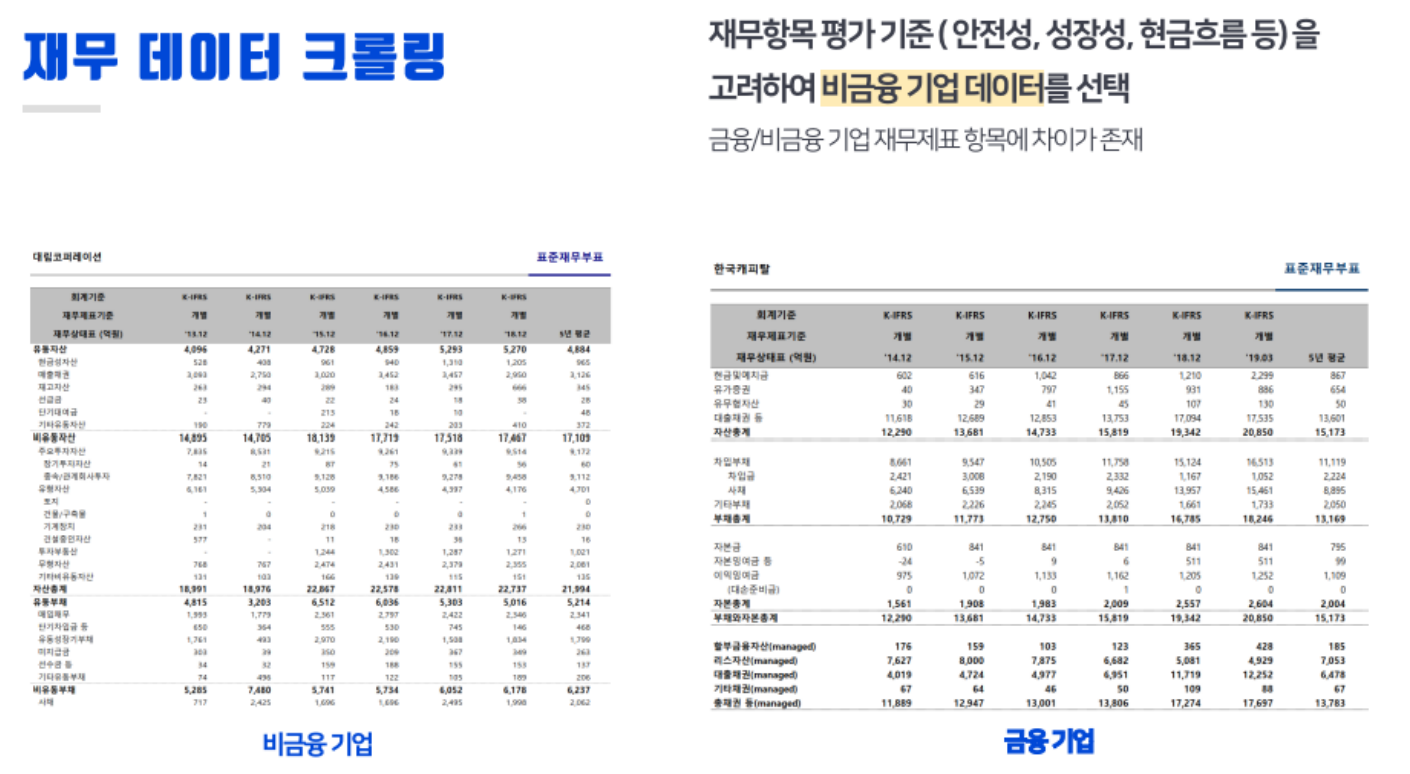

In [ ]:
#nonbank 기업 하나 불러오기 
import pandas as pd

df_nonbank = get_df_nonbank('대림')

In [ ]:
#balance sheet _ 비금융데이터

Bs_begin_idx = df_nonbank[df_nonbank['회계기준'].values == '유동자산'].index[0] 
Bs_end_idx = df_nonbank[df_nonbank['회계기준'].values == '단기성차입금'].index[0] 

Bs_nonbank = df_nonbank[Bs_begin_idx:Bs_end_idx+1].set_index('회계기준').dropna()
Bs_nonbank # balance sheet 


In [ ]:
#balance sheet %_ 비금융데이터

Bs_begin_idx_percentage = df_nonbank[df_nonbank['회계기준'].values == '부채비율(%)'].index[0] 
Bs_end_idx_percentage = df_nonbank[df_nonbank['회계기준'].values == '운전자금회전기간(일)'].index[0] 

Bs_percentage_nonbank = df_nonbank[Bs_begin_idx_percentage:Bs_end_idx_percentage+1].set_index('회계기준').dropna()
Bs_percentage_nonbank # balance sheet (%)

In [ ]:
#income statement _ 비금융데이터


Is_begin_idx = df_nonbank[df_nonbank['회계기준'].values == '매출액'].index[0] 
Is_end_idx = df_nonbank[df_nonbank['회계기준'].values == '총포괄이익'].index[0] 

Is_nonbank = df_nonbank[Is_begin_idx:Is_end_idx+1].set_index('회계기준').dropna()
Is_nonbank # Income Statement

In [ ]:
#income statement % _ 비금융데이터

Is_begin_idx_percentage = df_nonbank[df_nonbank['회계기준'].values == '매출원가율(%)'].index[0] 
Is_end_idx_percentage = df_nonbank[df_nonbank['회계기준'].values == 'EBITDA증가율(%)'].index[0] 

Is_percentage_nonbank = df_nonbank[Is_begin_idx_percentage:Is_end_idx_percentage+1].set_index('회계기준').dropna()
Is_percentage_nonbank # Income statement (%)

In [ ]:
#Cash Flow  _ 비금융데이터

CF_begin_idx = df_nonbank[df_nonbank['회계기준'].values == 'EBITDA'].index[1]
CF_end_idx = df_nonbank[df_nonbank['회계기준'].values == '현금의증가(감소)'].index[0]


CF_nonbank = df_nonbank[CF_begin_idx:CF_end_idx+1].set_index('회계기준').dropna()
CF_nonbank #Cash Flow

In [ ]:
#Cash Flow % _ 비금융데이터

CF_begin_idx_percentage = df_nonbank[df_nonbank['회계기준'].values == 'OCF/매출액(%)'].index[0] 
CF_end_idx_percentage = df_nonbank[df_nonbank['회계기준'].values == '유동성계수(배)'].index[0] 

CF_percentage_nonbank = df_nonbank[CF_begin_idx_percentage:CF_end_idx_percentage+1].set_index('회계기준').dropna()
CF_percentage_nonbank # Income statement (%)

# 금융데이터 전처리

In [ ]:
#bank 기업 하나 불러오기 
import pandas as pd

df_bank = get_df_bank('BNK투자증권')
df_bank.index = range(len(df_bank))
df_bank

In [ ]:
#balance sheet _ 금융데이터

Bs_begin_idx = df_bank[df_bank['회계기준'].values == '현금및예치금'].index[0] 
Bs_end_idx = df_bank[df_bank['회계기준'].values == '자본총계'].index[0] 

Bs_bank = df_bank[Bs_begin_idx:Bs_end_idx+1].set_index('회계기준').dropna()
Bs_bank # balance sheet 


In [ ]:
# balance sheet %_ 금융데이터

Bs_begin_idx_percentage = df_bank[df_bank['회계기준'].values == '충당금 등/고정이하자산(%)'].index[0] 
Bs_end_idx_percentage = df_bank[df_bank['회계기준'].values == '외부차입비중(%)'].index[0] 

Bs_percentage_bank = df_bank[Bs_begin_idx_percentage:Bs_end_idx_percentage+1].set_index('회계기준').dropna()
Bs_percentage_bank # balance sheet (%)

In [ ]:
#income statement _ 금융데이터


Is_begin_idx = df_bank[df_bank['회계기준'].values == '순수수료손익'].index[0] 
Is_end_idx = df_bank[df_bank['회계기준'].values == '총포괄이익'].index[0] 

Is_bank = df_bank[Is_begin_idx:Is_end_idx+1].set_index('회계기준').dropna()
Is_bank # Income Statement

In [ ]:
#income statement % _ 금융데이터

Is_begin_idx_percentage = df_bank[df_bank['회계기준'].values == '수수료수익분산도(%)'].index[0] 
Is_end_idx_percentage = df_bank[df_bank['회계기준'].values == '순이익증가율(%)'].index[0] 

Is_percentage_bank = df_bank[Is_begin_idx_percentage:Is_end_idx_percentage+1].set_index('회계기준').dropna()
Is_percentage_bank # Income statement (%)

# 비금융 기업 데이터 feature화 작업

In [ ]:
Bs_nonbank.index = Bs_nonbank.index.str.replace(' ','')
Bs_percentage_nonbank.index = Bs_percentage_nonbank.index.str.replace(' ','')
Is_nonbank.index = Is_nonbank.index.str.replace(' ','')
Is_percentage_nonbank.index = Is_percentage_nonbank.index.str.replace(' ','')
CF_nonbank.index = CF_nonbank.index.str.replace(' ','')
CF_percentage_nonbank.index = CF_percentage_nonbank.index.str.replace(' ','')

In [ ]:
df_nonbank_final = pd.DataFrame(index = ['대림'])


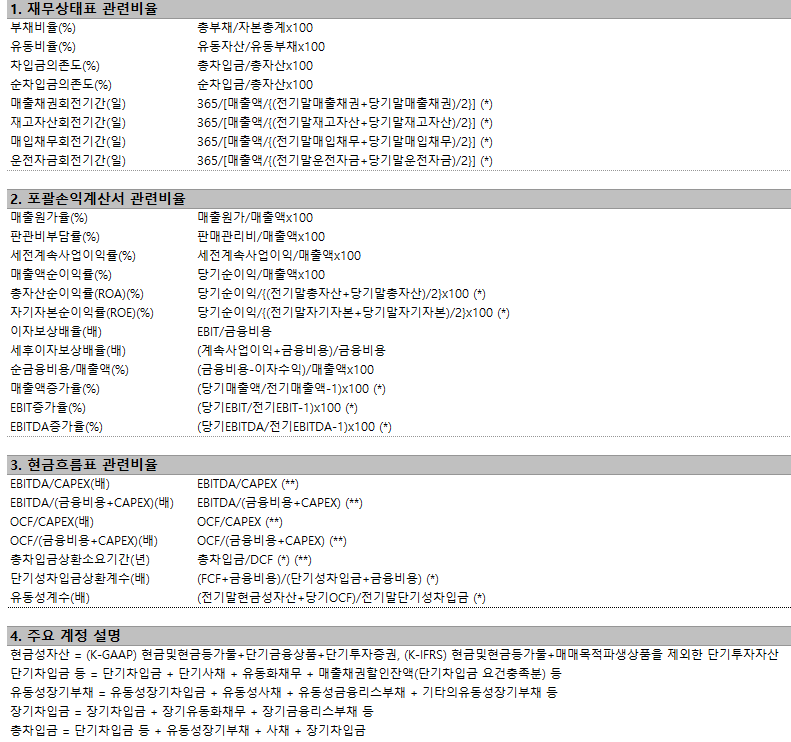

- 모든비율에는 *100 시행한다 
- 부채비율 = Debt/Equity = 부채총계 / 자본총계
- 차입금의존도 = Debt/Asset = 부채총계 / 자산총계 
- 고정장기적합률 = 유형자산 + 무형자산 / 유형자산 + 무형자산 + 투자자산(long_term)
- 자기자본순이익률 : 당기순이익(Net Income)/자기자본 
- 매출액영업이익률(Operating Profit Margin) = 영업이익(EBIT) / 총매출액 
- 매출액경상이익률(Net Profit Margin) = 당기순이익/ 총매출액 
- 이자보상배율(Interest coverage) = EBIT(Operational Profit)/ Interest Payment(단기차입금 + 장기차입금 + 기타유동부채) 
- 금융비용부담률 = 총금융비용(단기차입금+장기차입금+기타유동부채) / 총매출액 
- 순금융비용부담률 = 총금융비용-총이자수익 / 총매출액
- 매출액증가율 = (올해 매출액/ 전년도 매출액 )-1
- 총자산 증가율 = (올해 자산/ 전년도 자산 )-1
- 자기자본 증가율 = (올해 자기자본/ 전년도 자기자본 )-1
- 매출채권 회전기일(DSO) =  Receivables(매출채권)/Sales(매출액) *365
- 재고자산 회전기일 (DIO) = Avg.Inventory(재고자산)/CGS(매출원가)  *365
- 매입채무 회전기일(DPO)= Payables(매입채무)/CGS(매출원가) *365
- 부채상환계수(DSCR) = 당기순이익 + 감가상각+ 기타상각+ 금융비용/ 단기차입금+유동성장기차입금+유동성사채+금융비용 +!00
- 총차입금 상환능력비율 = 현금흐름/총차입금 
- 잉여현금흐름/총차입금(%) = 잉여현금흐름/총차입금 *100 
- 영업현금흐름/총부채(%) = 영언현금흐름/총부채(%) *100

In [ ]:



B4 = Bs_nonbank['K-IFRS.4']
BP4 = Bs_percentage_nonbank['K-IFRS.4']
I4 = Is_nonbank['K-IFRS.4']
IP4 = Is_percentage_nonbank['K-IFRS.4']
C4 = CF_nonbank['K-IFRS.4']
CP4 = CF_percentage_nonbank['K-IFRS.4']

B5 = Bs_nonbank['K-IFRS.5']
BP5 = Bs_percentage_nonbank['K-IFRS.5']
I5 = Is_nonbank['K-IFRS.5']
IP5 = Is_percentage_nonbank['K-IFRS.5']
C5 = CF_nonbank['K-IFRS.5']
CP5 = CF_percentage_nonbank['K-IFRS.5']

df_nonbank_final['부채비율']=BP5['부채비율(%)']
df_nonbank_final['차입금의존도']=BP5['차입금의존도(%)']
df_nonbank_final['고정장기적합률']=(B5['유형자산']+B5['무형자산'])/(B5['유형자산']+B5['무형자산']+B5['장기투자자산'])
df_nonbank_final['자기자본순이익률(ROE)']=IP5['자기자본순이익률(ROE)(%)']
df_nonbank_final['매출액영업이익률']=IP5['EBIT/매출액(%)']
df_nonbank_final['이자보상배율']=IP5['이자보상배율(배)']
df_nonbank_final['금융비용부담률']=IP5['금융비용/매출액(%)']
df_nonbank_final['순금융비용부담률 ']=IP5['순금융비용/매출액(%)']
df_nonbank_final['매출액증가율 ']=IP5['매출액증가율(%)']
df_nonbank_final['매출액경상이익률']=I5['당기순이익']/I5['매출액']
df_nonbank_final['총자산증가율'] =(B5['자산총계']/B4['자산총계']-1) *100
df_nonbank_final['영업이익증가율'] =(I5['EBIT(조정영업이익)']/I4['EBIT(조정영업이익)']-1) *100
df_nonbank_final['자기자본증가율'] =(B5['자본총계']/B4['자본총계']-1) *100
df_nonbank_final['매출채권 회전기일(DSO)']=BP5['매출채권회전기간(일)']
df_nonbank_final['재고자산 회전기일(DIO)']=BP5['매입채무회전기간(일)']
df_nonbank_final['매입채무 회전기일(DPO)']=BP5['운전자금회전기간(일)']
df_nonbank_final['잉여현금흐름/총차입금(%)']=CP5['FCF/총차입금(%)']
df_nonbank_final['영업현금흐름/총부채(%)']=C5['잉여현금흐름(FCF)']/B5['부채총계']


#부채상환계수(DSCR) = 당기순이익 + 감가상각+ 기타상각+ 금융비용/ 단기차입금+유동성장기차입금+유동성사채+금융비
#df_nonbank['부채상환계수(DSCR)']=(I5['당기순이익']+I5['당기순이익']+) -> 손익계산서만 보고 파악 불가 




df_nonbank_final

In [ ]:
# 한번에 합쳐서 진행 

def get_df_nonbank_final(comname):

    df_nonbank = get_df_nonbank(comname)
    
    try : df_nonbank.dropna().set_index('회계기준')
    except : pass
    else:
        df_nonbank = df_nonbank.dropna().set_index('회계기준')
        df_nonbank_final = pd.DataFrame(index = [comname])

        df_nonbank.index = df_nonbank.index.str.replace(' ','')
        D5 = df_nonbank['K-IFRS.5']
        D4=  df_nonbank['K-IFRS.4']

        column_list = df_nonbank.columns.tolist()

        for column in column_list:
            index_list= df_nonbank[column][df_nonbank[column].values == '-'].index.tolist()
            for index in index_list:
                df_nonbank[column][index] = 0
        
        try: D5['부채비율(%)']
        except: pass
        else: 

            df_nonbank_final['부채비율']=D5['부채비율(%)']
            df_nonbank_final['차입금의존도']=D5['차입금의존도(%)']
            df_nonbank_final['고정장기적합률']=(D5['유형자산']+D5['무형자산'])/(D5['유형자산']+D5['무형자산']+D5['장기투자자산'])
            df_nonbank_final['자기자본순이익률(ROE)']=D5['자기자본순이익률(ROE)(%)']
            df_nonbank_final['매출액영업이익률']=D5['EBIT/매출액(%)']
            df_nonbank_final['이자보상배율']=D5['이자보상배율(배)']
            df_nonbank_final['금융비용부담률']=D5['금융비용/매출액(%)']
            df_nonbank_final['순금융비용부담률 ']=D5['순금융비용/매출액(%)']
            df_nonbank_final['매출액증가율 ']=D5['매출액증가율(%)']
            
            try : D5['당기순이익']/D5['매출액']
            except:pass 
            else: 
                df_nonbank_final['매출액경상이익률']=D5['당기순이익']/D5['매출액']
                df_nonbank_final['총자산증가율'] =(D5['자산총계']/D4['자산총계']-1) *100
                df_nonbank_final['영업이익증가율'] =(D5['EBIT(조정영업이익)']/D4['EBIT(조정영업이익)']-1) *100
                df_nonbank_final['자기자본증가율'] =(D5['자본총계']/D4['자본총계']-1) *100
                df_nonbank_final['매출채권 회전기일(DSO)']=D5['매출채권회전기간(일)']
                df_nonbank_final['재고자산 회전기일(DIO)']=D5['매입채무회전기간(일)']
                df_nonbank_final['매입채무 회전기일(DPO)']=D5['운전자금회전기간(일)']
                df_nonbank_final['잉여현금흐름/총차입금(%)']=D5['FCF/총차입금(%)']
                df_nonbank_final['영업현금흐름/총부채(%)']=D5['잉여현금흐름(FCF)']/D5['부채총계']

                return df_nonbank_final

In [ ]:
import pandas as pd 

comname_list = pd.read_excel('com_date_list1.xlsx')['Unnamed: 0'].values.tolist()
comname_list

In [ ]:
import pandas as pd


drop_company_end1.to_excel('drop_company_end1.xlsx', encoding='cp949')
comname_list=pd.read_csv('drop_company_end1.csv')['기업명']

In [ ]:
df_nonbank_list =[]
for comname in comname_list:
    print(comname)
    df_nonbank_final = get_df_nonbank_final(comname)
    df_nonbank_list.append(df_nonbank_final)
    
    


In [ ]:
pd.concat(df_nonbank_list, axis=0).to_excel('df_feature_label1.xlsx')

In [ ]:
com_date_list1 = pd.read_excel('com_date_list1.xlsx')
com_date_list1.columns=['기업명', '등급결정일', '등급확정일', '등급']
com_date_list1 = com_date_list1.set_index('기업명')
original_names = com_date_list1.index.tolist()
original_names

In [ ]:
com_date_list = pd.read_csv('credit_dataset.csv')
com_date_list.to_excel('credit_dataset.xlsx', encoding='cp949')

In [ ]:
com_date_list2 = pd.read_excel('credit_dataset.xlsx')
com_date_list2['기업명'] = com_date_list2['기업명'].str.replace(' ','')
com_date_list2 = com_date_list2.set_index('기업명')
com_date_list2 = com_date_list2[com_date_list2.index.value_counts() ==1]
com_date_list2_index = com_date_list2.index.tolist()

#df_feature.loc['신성이엔지']
#df_feature.drop(df_feature[df_feature.index == c].index.values)

for c in com_date_list2_index:
    
    try: df_feature.loc[c]
    except: pass
    else:
        df_feature.drop(df_feature[df_feature.index ==c].index.values)
    

In [ ]:
df_feature

In [ ]:
df_feature = pd.concat(df_nonbank_list, axis=0)
df_index_list = df_feature.index.tolist()

df_feature['등급']=com_date_list2.loc[df_index_list]['등급']
df_feature

In [ ]:
df_feature.to_excel('df_feature_label.xlsx')